# Wind Speed Frequency Distribution Exercise using Numpy and Pandas

In [1]:
import numpy as np
import pandas as pd

---
### Import `powercurve.csv` and `windspeed.csv`

In [2]:
# powercurve.csv consists of 2 columns: wind speed and output power. The first row is header
# windspeed.csv consists of 2 columns: running sequence (1 to 8760) and wind speeds. There is no header

powercurve = 'https://raw.githubusercontent.com/yoonghm/whft_2018_Oct/master/python/PowerCurve.csv'
windspeed  = 'https://raw.githubusercontent.com/yoonghm/whft_2018_Oct/master/python/WindSpeed.csv'

# Read powercuver.csv into DataFrame c, use 'Wind speed (m/s)' as index
c = pd.read_csv(powercurve, index_col='Wind speed (m/s)')

# Read windspeed.csv into DataFrame w, use 1st column as index, 2nd column is named 'Wind speed @ 10m'
w = pd.read_csv(windspeed, header=None, names=['Wind speed @ 10m'])

In [3]:
c.describe() # Describe the Dataframe c

,Output power (kW)
count,26.000000
mean,1898.846154
std,1296.087426
min,0.000000
25%,422.500000
50%,2770.000000
75%,3000.000000
max,3000.000000


In [4]:
c.tail() # Show the last few rows of c

,Output power (kW)
Wind speed (m/s),
21,3000
22,3000
23,3000
24,3000
25,3000


In [5]:
w.describe() # Describe the Dataframe w

,Wind speed @ 10m
count,8760.000000
mean,5.000010
std,2.634291
min,0.126500
25%,3.022800
50%,4.645350
75%,6.611975
max,17.601200


In [6]:
w.head() # Show the first few rows w

,Wind speed @ 10m
1,3.7882
2,3.2806
3,2.9823
4,1.0027
5,1.3936


---
### Plot the power curve

In [7]:
# index in DataFrame c is automatically used as x-axis
c.plot.line(y='Output power (kW)',
            title='Wind Turbine Power Curve',
            legend=False)

** Let's compute wind speed @ 100 m**

---
### Estimate wind speeds at 100 m assuming roughness length is 0.1

In [8]:
import math

r = 0.1 # Roughness lenght
factor = math.log(100/r)/math.log(10/r)

# Create a new column 'Wind speed @ 100m'
w['Wind speed @ 100m'] = w['Wind speed @ 10m'] * factor

In [9]:
w.tail()

,Wind speed @ 10m,Wind speed @ 100m
8756,4.4976,6.74640
8757,7.2015,10.80225
8758,7.4963,11.24445
8759,4.2615,6.39225
8760,3.5495,5.32425


---
### Determine the highest wind speed in column `'Wind speed @ 100m'`

In [10]:
max = w['Wind speed @ 100m'].max()
print(f'max = {max:.2f}') # print to two decimal points

max = 26.40


#### Round up `max` to the next higher integer

In [11]:
# Round up max to the next higher unit
max = math.ceil(max)
print(f'max = {max}')

max = 27


### Create equally-spaced bins to count frequency of wind speeds

In [12]:
bins = np.arange(1.0, max+1, 1)

In [13]:
# bins is a numpy array object
type(bins)

numpy.ndarray

In [14]:
# Let print it out
print(bins)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27.]


---
### Determine frequency distribution using `np.histogram()`

In [15]:
# np.histogram() returns two objects: freqeuncy (y-axis) and division (x-axis)
frequency, division = np.histogram(w['Wind speed @ 100m'], bins=bins)

In [16]:
print(frequency)

[338 564 729 856 908 900 832 750 641 532 432 328 249 189 138  91  66  37
  30  14  13   4   4   5   0   2]


In [17]:
print(division)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27.]


---
### Computer annual energy generation

In [18]:
# Store `frequency` into DataFrame c
c['Hour'] = frequency

In [19]:
c.head()

,Output power (kW),Hour
Wind speed (m/s),,
0,0,338
1,0,564
2,0,729
3,0,856
4,80,908


In [20]:
# Compute `kWH` by multiplying `Output power(kW)` and `Hour`
c['kWH'] = c['Output power (kW)'] * c['Hour']

In [21]:
c 

,Output power (kW),Hour,kWH
Wind speed (m/s),,,
0,0,338,0
1,0,564,0
2,0,729,0
3,0,856,0
4,80,908,72640
5,140,900,126000
6,360,832,299520
7,610,750,457500
8,1000,641,641000


In [22]:
# Sum the total kWH
Energy_MWH = c['kWH'].sum()/1000
print(f'Annual energy generation = {Energy_MWH} MW')

Annual energy generation = 6374.02 MW


---
### Let's plot the wind speed distribution

Text(0,0.5,'Frequency (hours)')

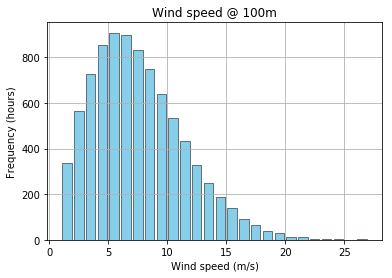

In [23]:
import matplotlib.pyplot as plt
h = w.hist('Wind speed @ 100m',
           bins=bins,
           edgecolor='black',
           linewidth=0.5,
           color="skyblue",
           rwidth=0.8)
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Frequency (hours)')